In [ ]:
!nvidia-smi

Mon May 20 15:57:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [ ]:
!ls

'Chemical Lab Data'   data.yaml   runs	 YOLOv8_ProjectModel.ipynb   yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/Project

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=30 imgsz=280 plots=True

/content/drive/MyDrive/Project
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=280, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

In [ ]:
!ls runs/detect/train4/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1716221380.1f9ae31227be.6287.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch4540.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch4541.jpg    weights
R_curve.png					    train_batch4542.jpg
results.csv					    val_batch0_labels.jpg


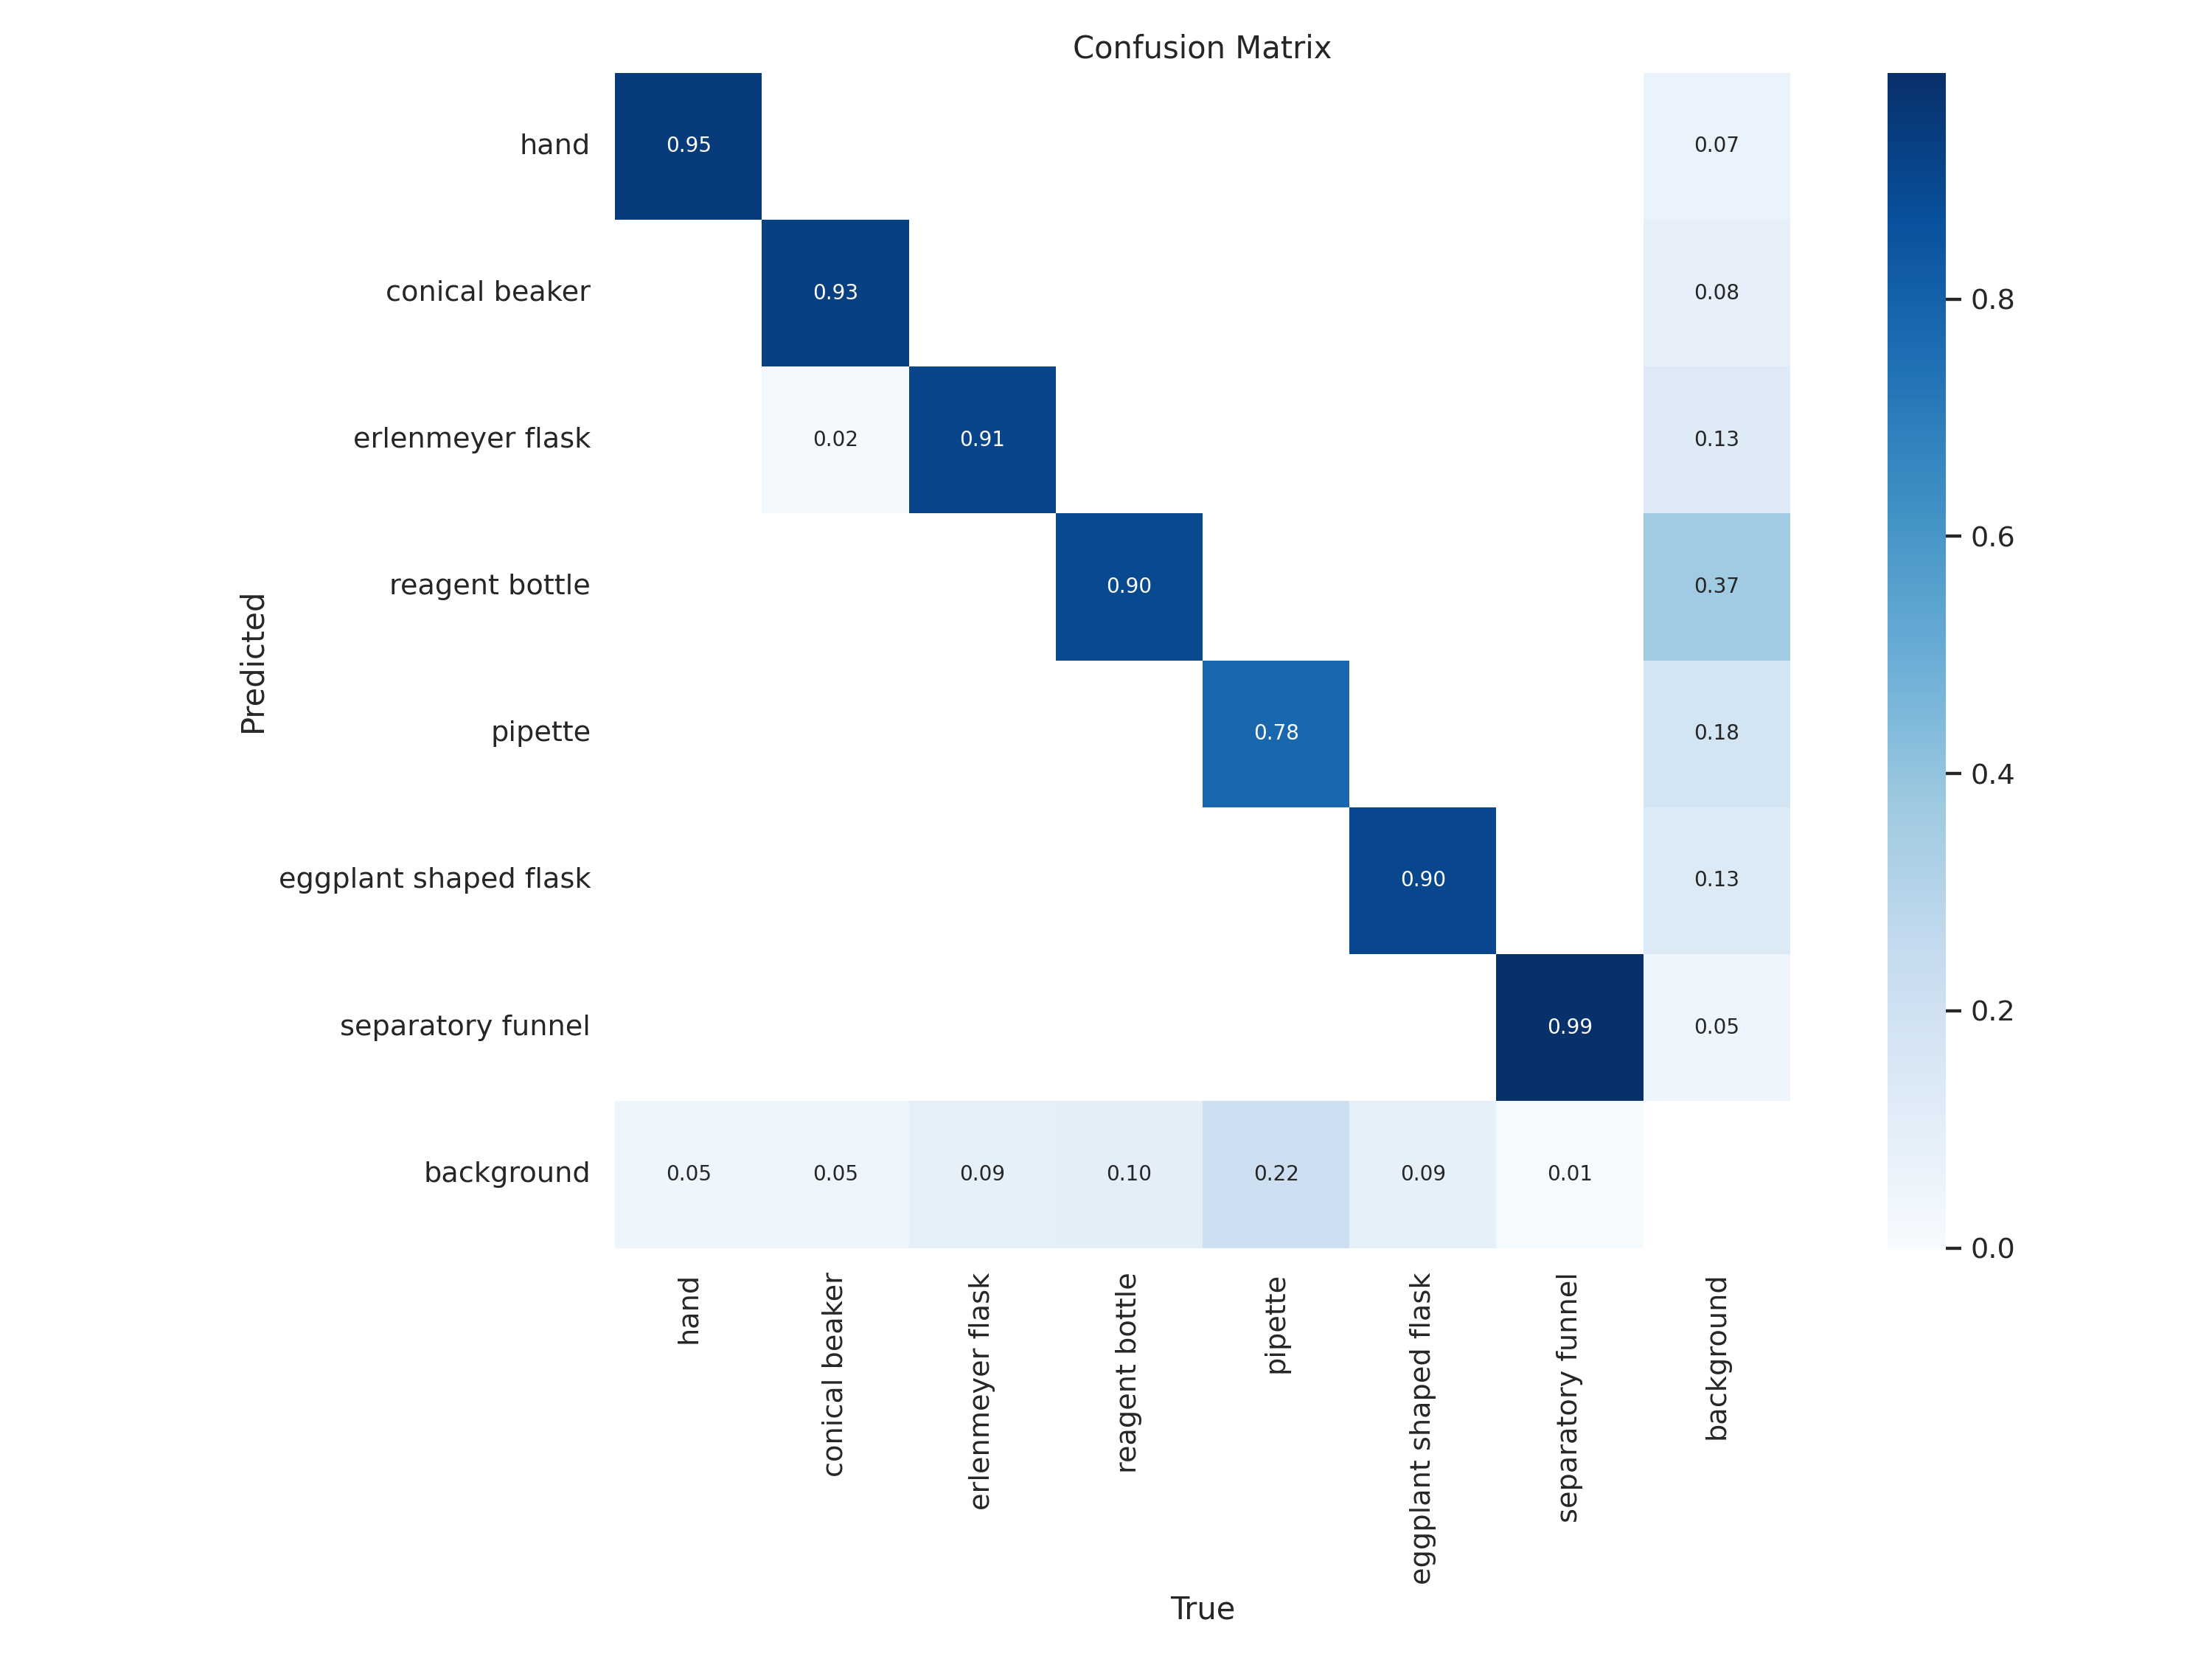

In [ ]:
Image(filename='/content/drive/MyDrive/Project/runs/detect/train4/confusion_matrix.png', width=600)

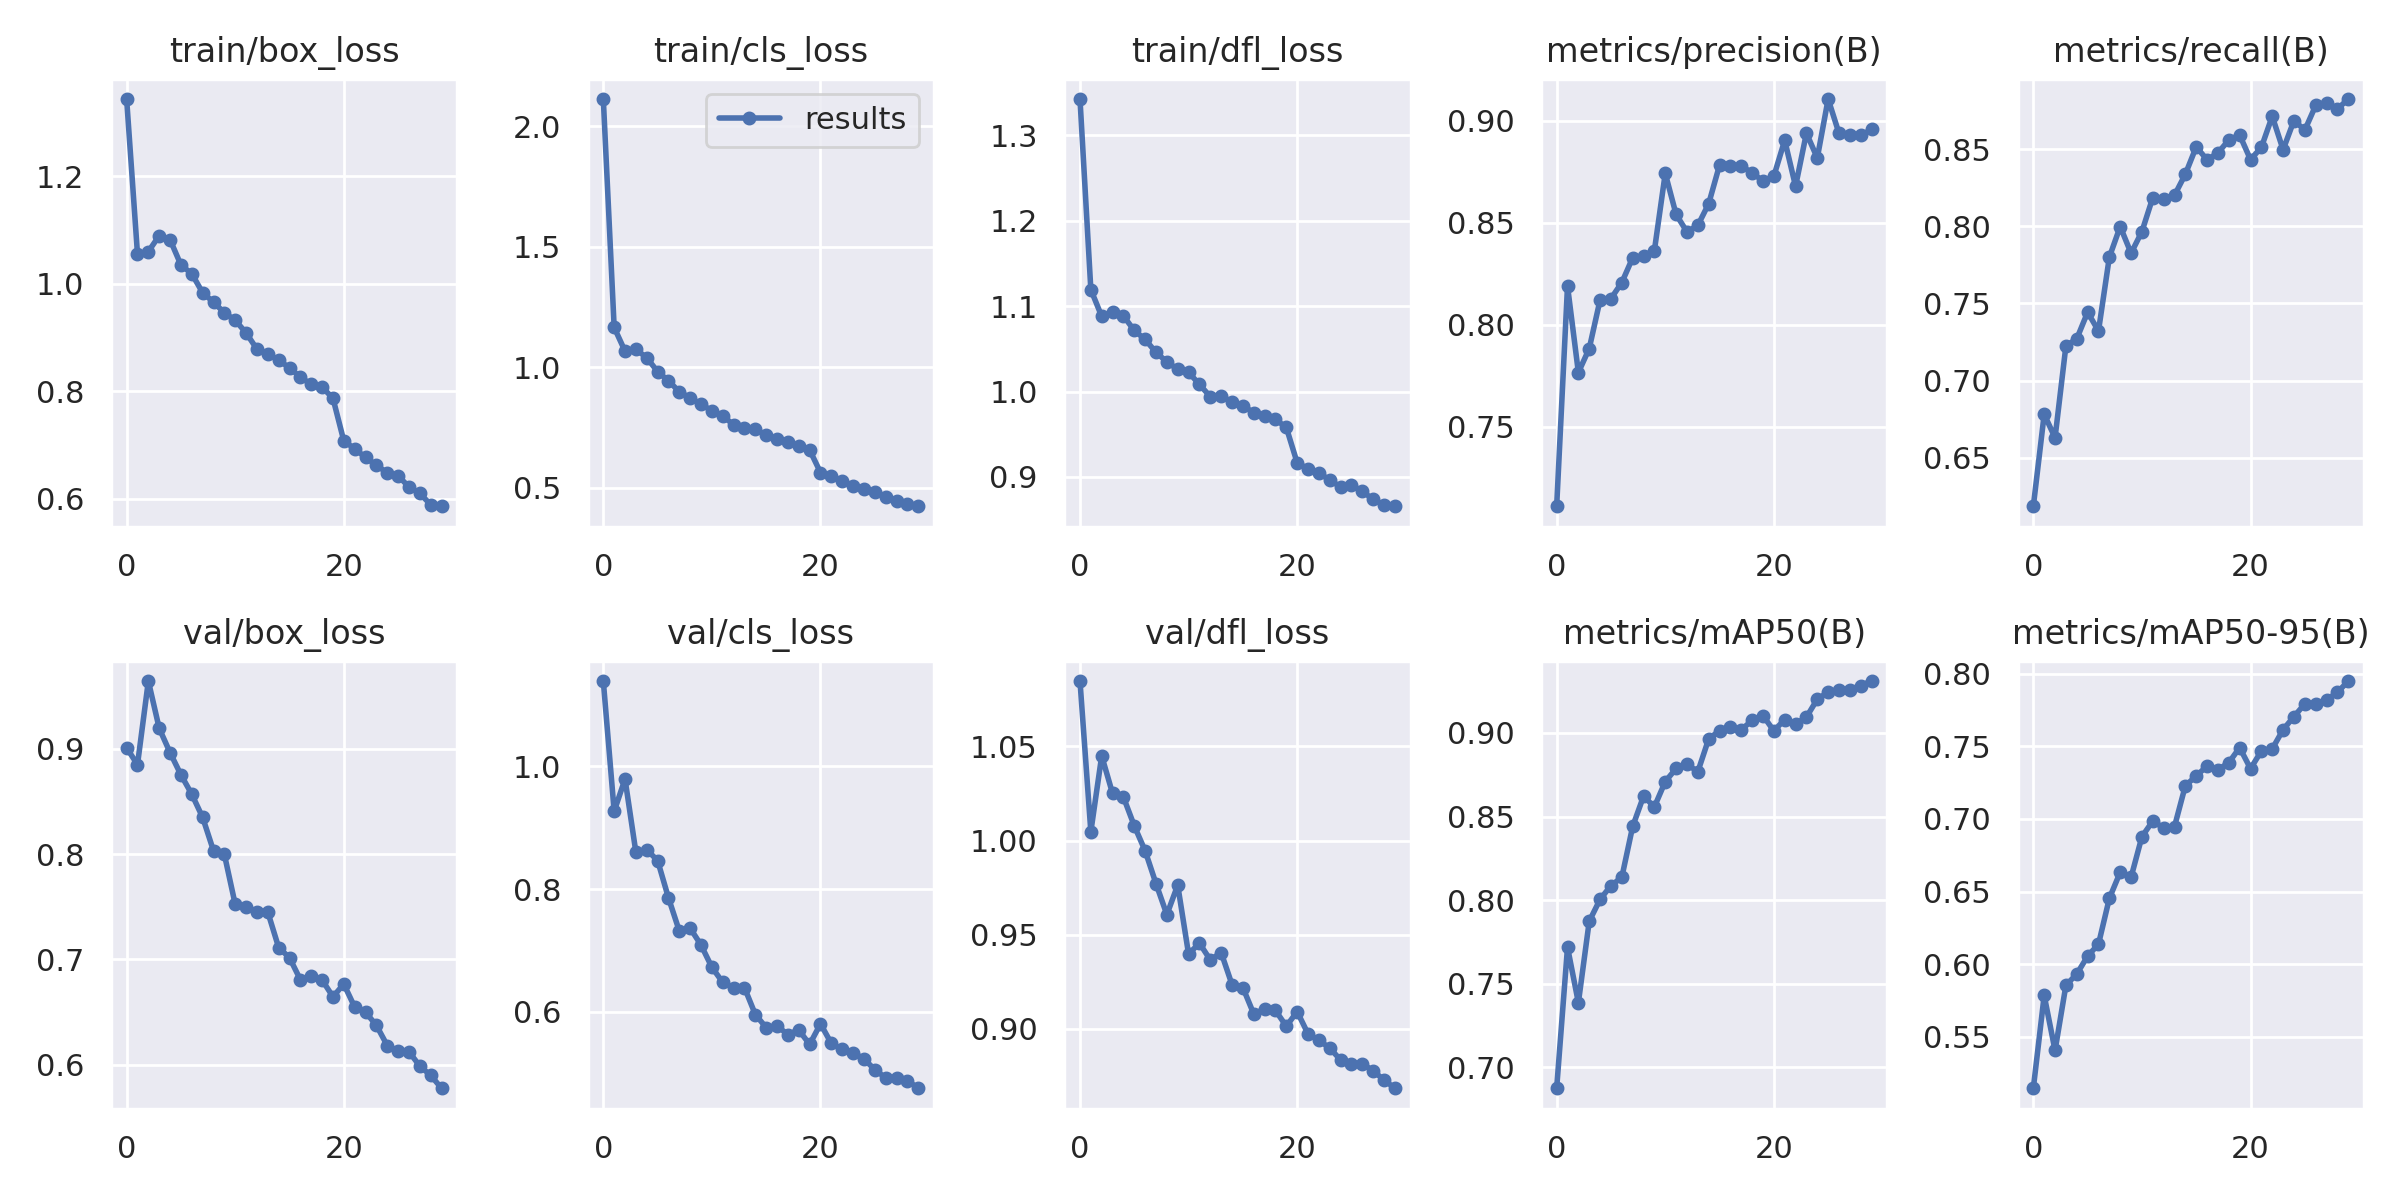

In [ ]:
Image(filename='runs/detect/train4/results.png', width=600)

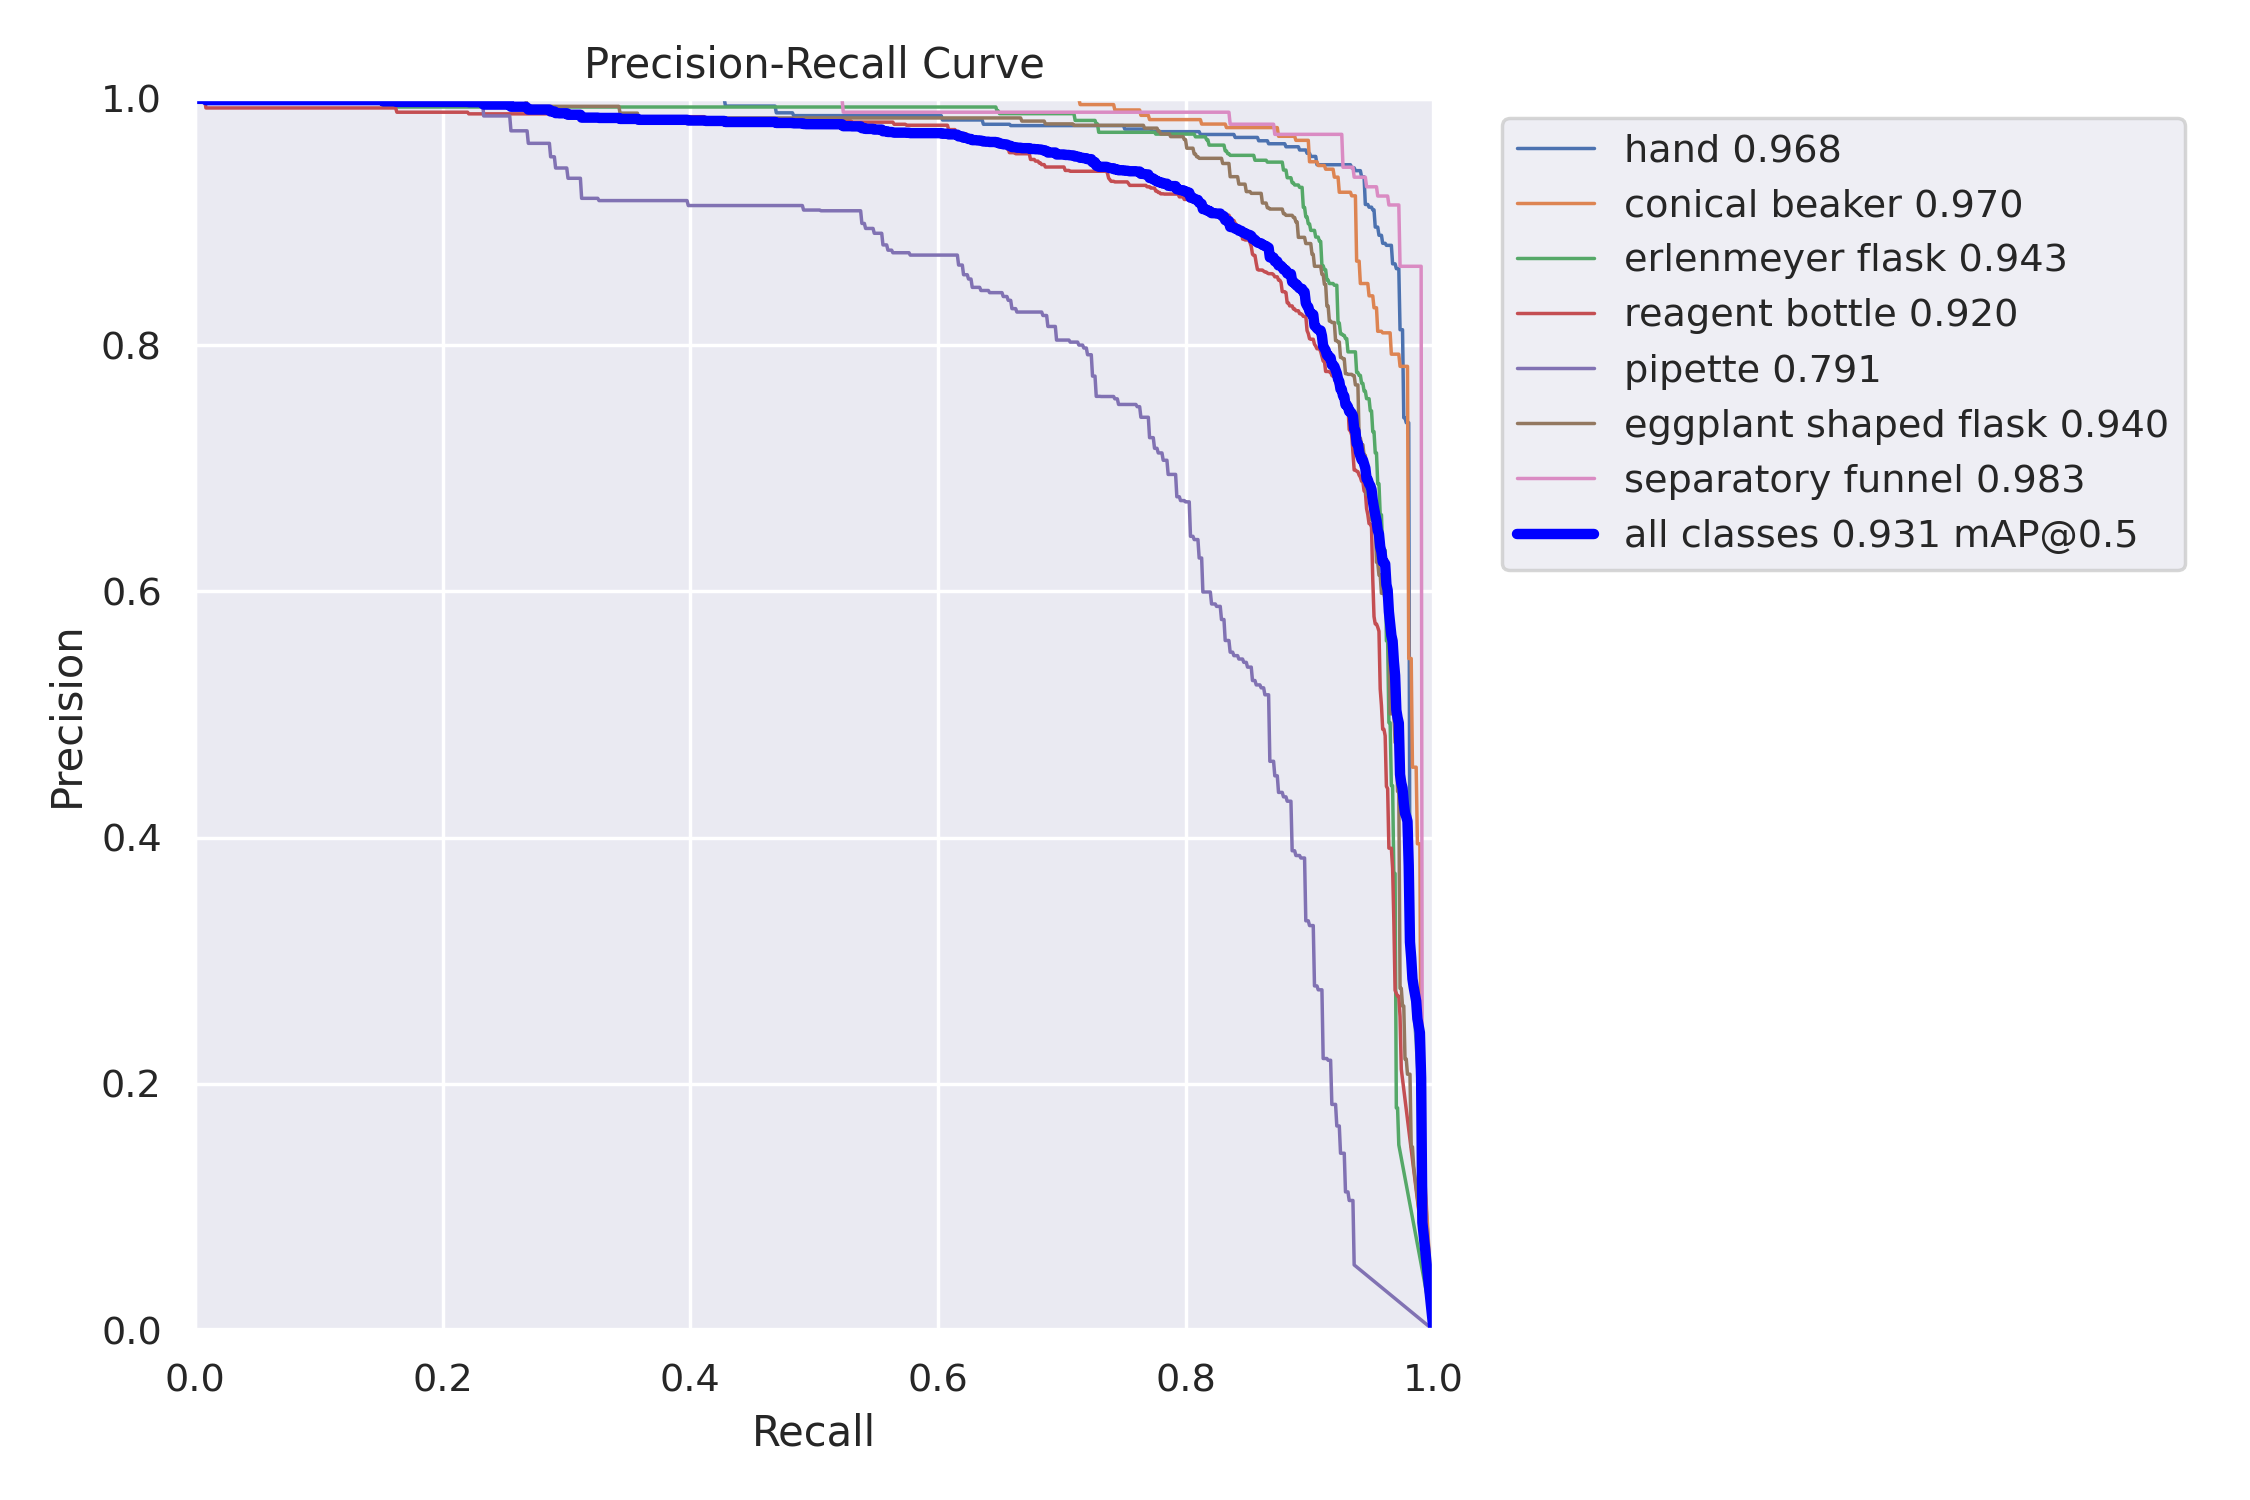

In [ ]:
Image(filename='runs/detect/train4/PR_curve.png', width=600)

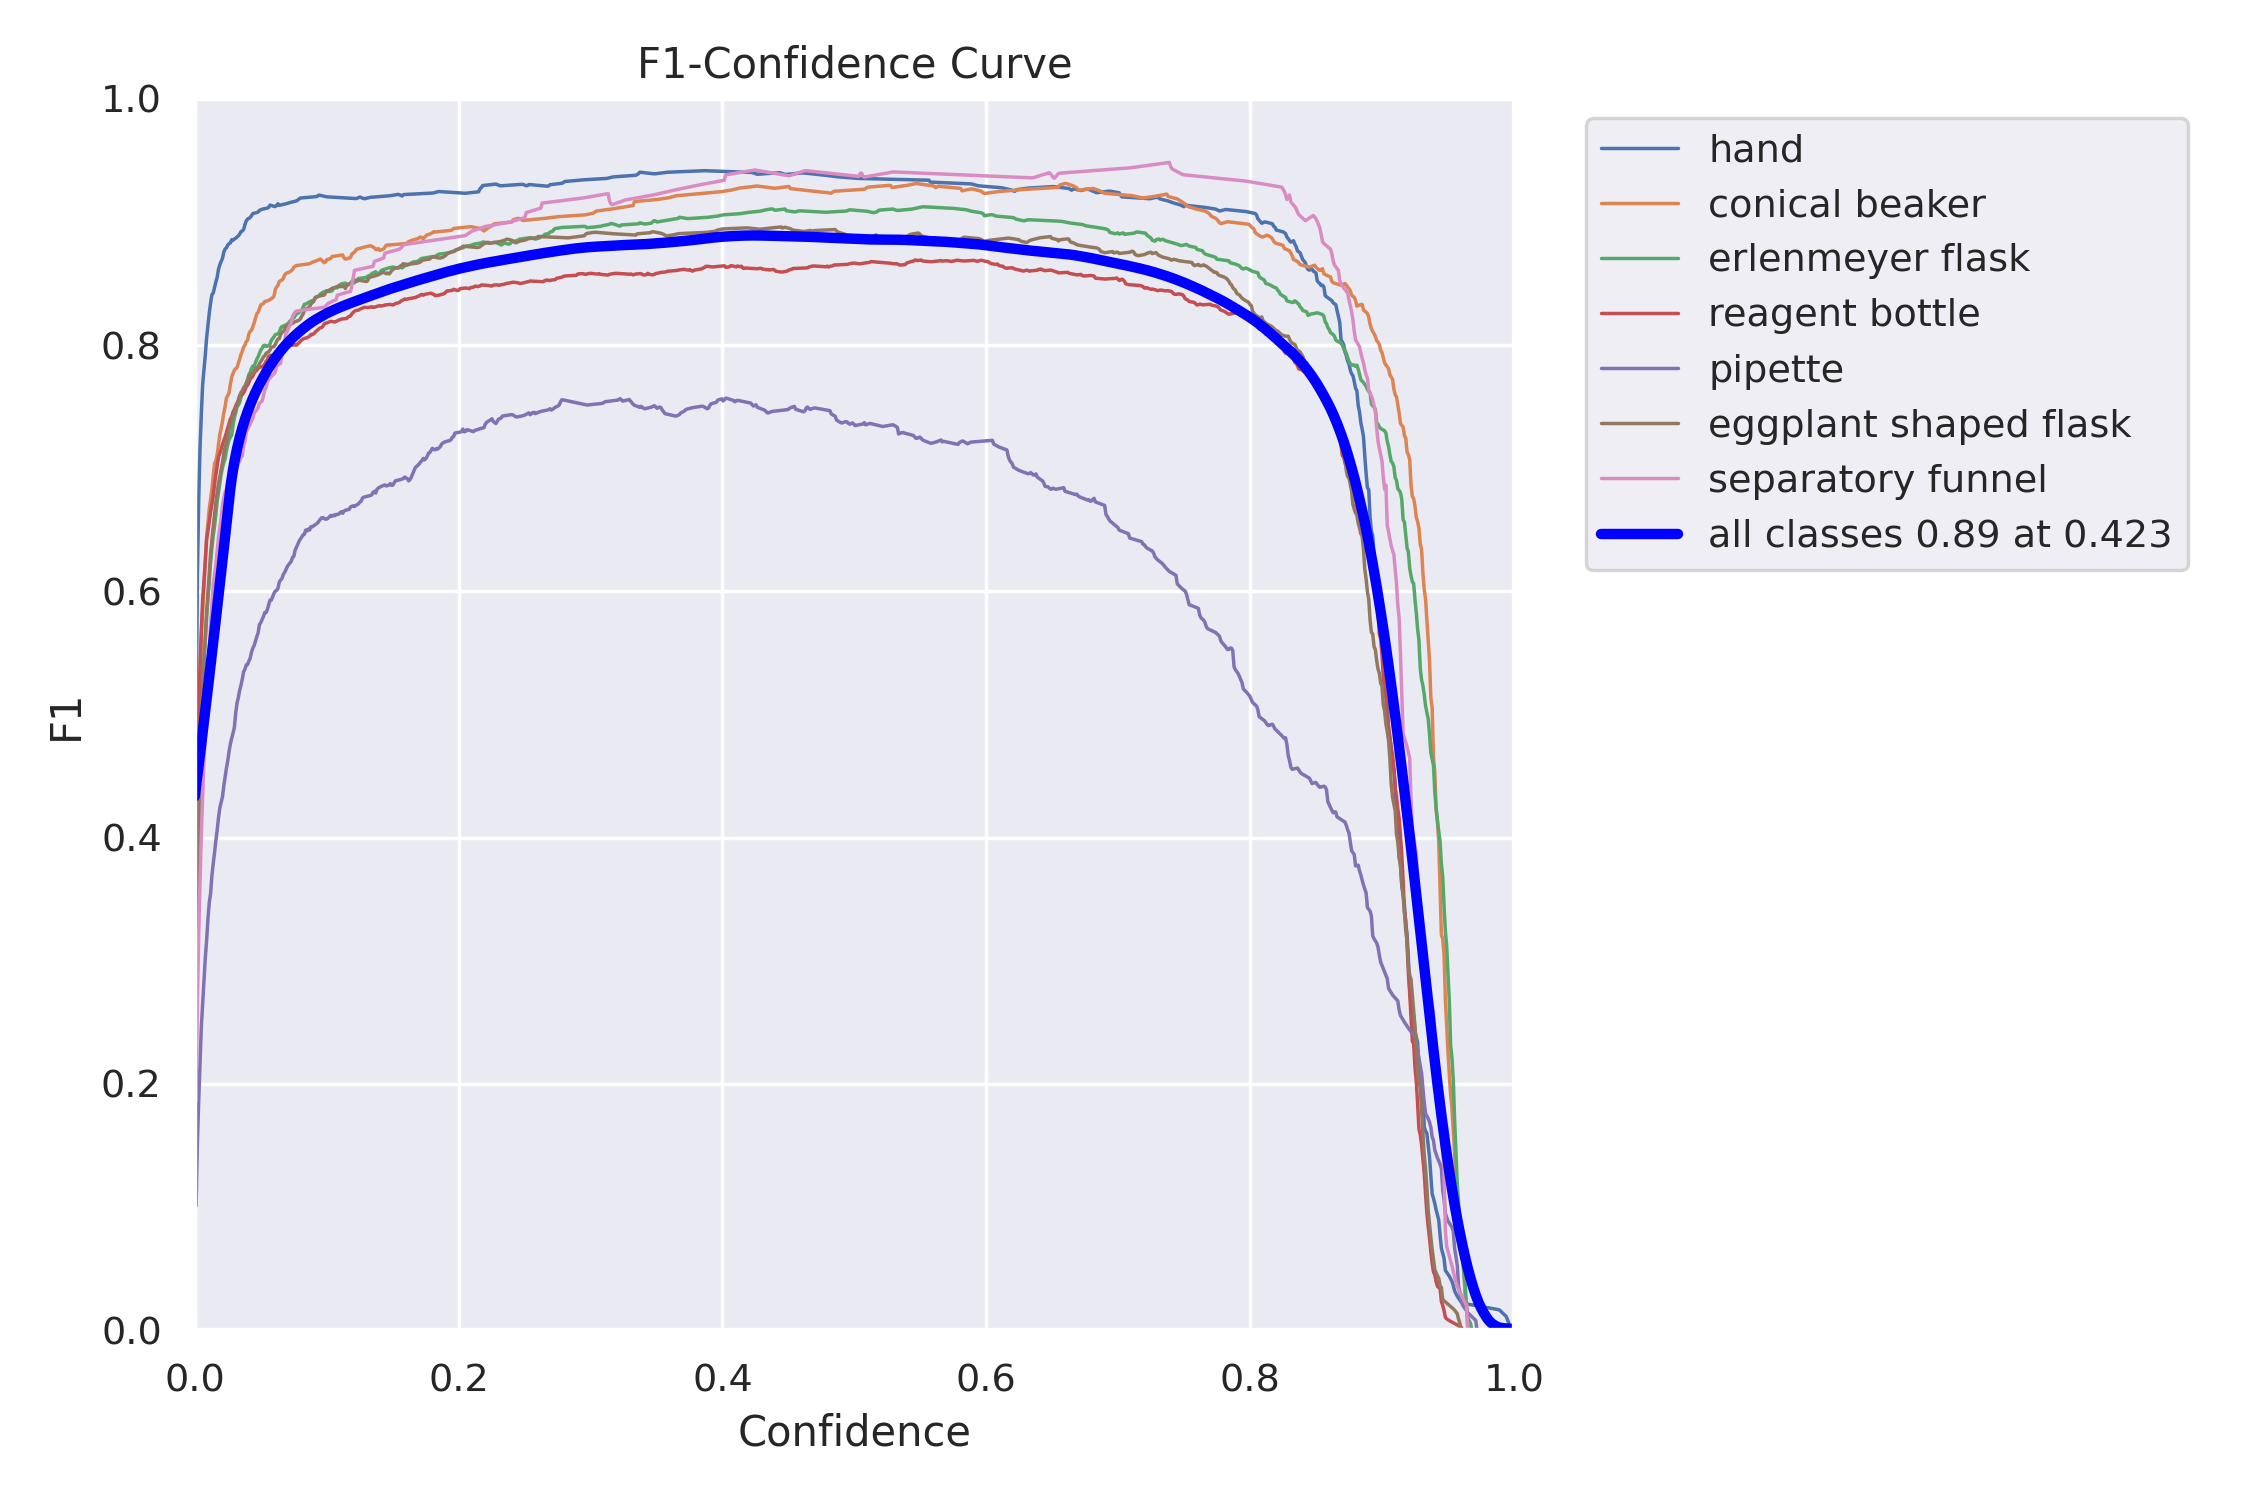

In [ ]:
Image(filename='runs/detect/train4/F1_curve.png', width=600)

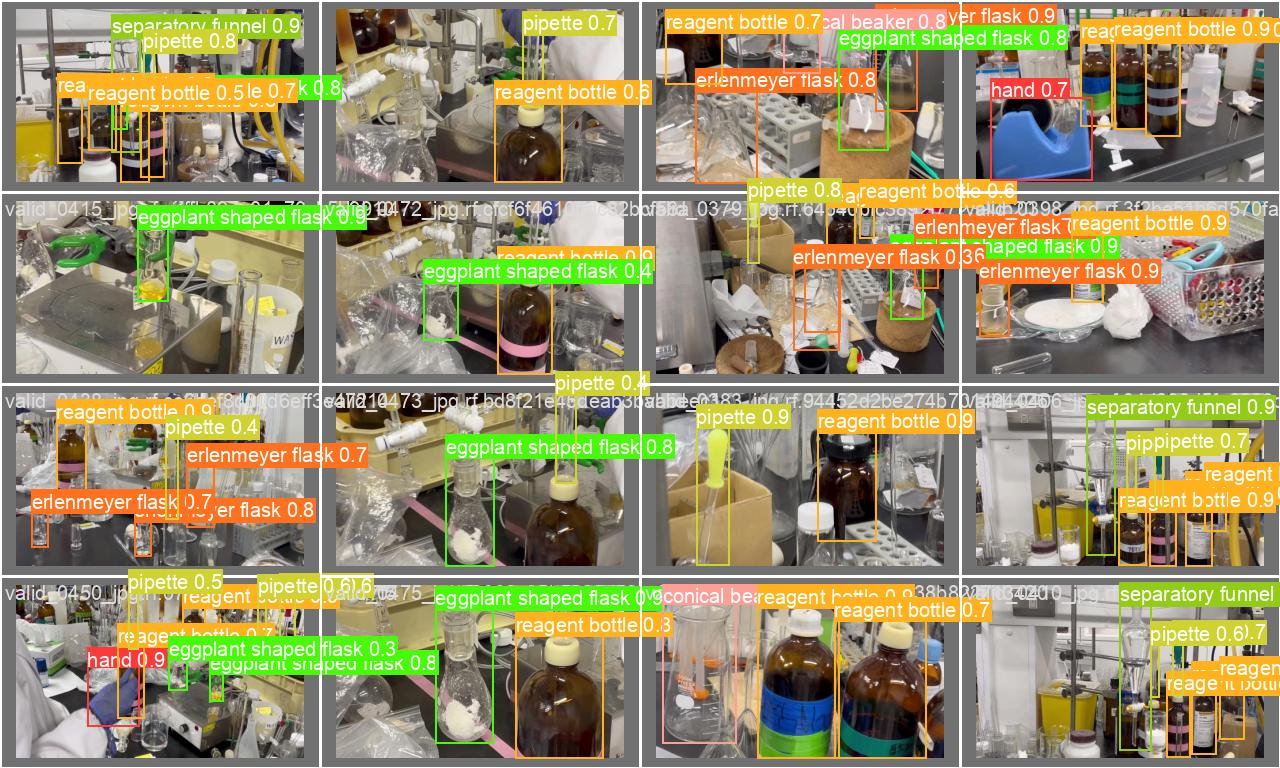

In [ ]:
Image(filename='runs/detect/train4/val_batch0_pred.jpg', width=600)

In [ ]:
%cd /content/drive/MyDrive/Project

!yolo task=detect mode=val model='runs/detect/train4/weights/best.pt' data=data.yaml

/content/drive/MyDrive/Project
2024-05-20 18:15:36.481910: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 18:15:36.481967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 18:15:36.484057: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 18:15:38.003727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/Proje

In [ ]:
import numpy as np

csv_file_path = '/content/drive/MyDrive/Project/runs/detect/train4/results.csv'
data = np.genfromtxt(csv_file_path, delimiter=',', skip_header=1)
print(data)

[[0.0000e+00 1.3431e+00 2.1136e+00 1.3426e+00 7.1096e-01 6.1843e-01
  6.8744e-01 5.1444e-01 9.0091e-01 1.1392e+00 1.0848e+00 7.0132e-02
  3.3186e-03 3.3186e-03]
 [1.0000e+00 1.0548e+00 1.1651e+00 1.1194e+00 8.1895e-01 6.7810e-01
  7.7184e-01 5.7837e-01 8.8493e-01 9.2697e-01 1.0047e+00 3.9913e-02
  6.4325e-03 6.4325e-03]
 [2.0000e+00 1.0595e+00 1.0666e+00 1.0880e+00 7.7653e-01 6.6287e-01
  7.3861e-01 5.4046e-01 9.6431e-01 9.7946e-01 1.0450e+00 9.4731e-03
  9.3263e-03 9.3263e-03]
 [3.0000e+00 1.0891e+00 1.0744e+00 1.0929e+00 7.8827e-01 7.2249e-01
  7.8735e-01 5.8537e-01 9.1942e-01 8.6010e-01 1.0250e+00 9.0100e-03
  9.0100e-03 9.0100e-03]
 [4.0000e+00 1.0816e+00 1.0391e+00 1.0886e+00 8.1217e-01 7.2709e-01
  8.0047e-01 5.9314e-01 8.9633e-01 8.6417e-01 1.0231e+00 9.0100e-03
  9.0100e-03 9.0100e-03]
 [5.0000e+00 1.0347e+00 9.8205e-01 1.0715e+00 8.1277e-01 7.4435e-01
  8.0868e-01 6.0545e-01 8.7525e-01 8.4667e-01 1.0078e+00 8.6800e-03
  8.6800e-03 8.6800e-03]
 [6.0000e+00 1.0183e+00 9.4345e-01

<ipython-input-6-7120750dd53a>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


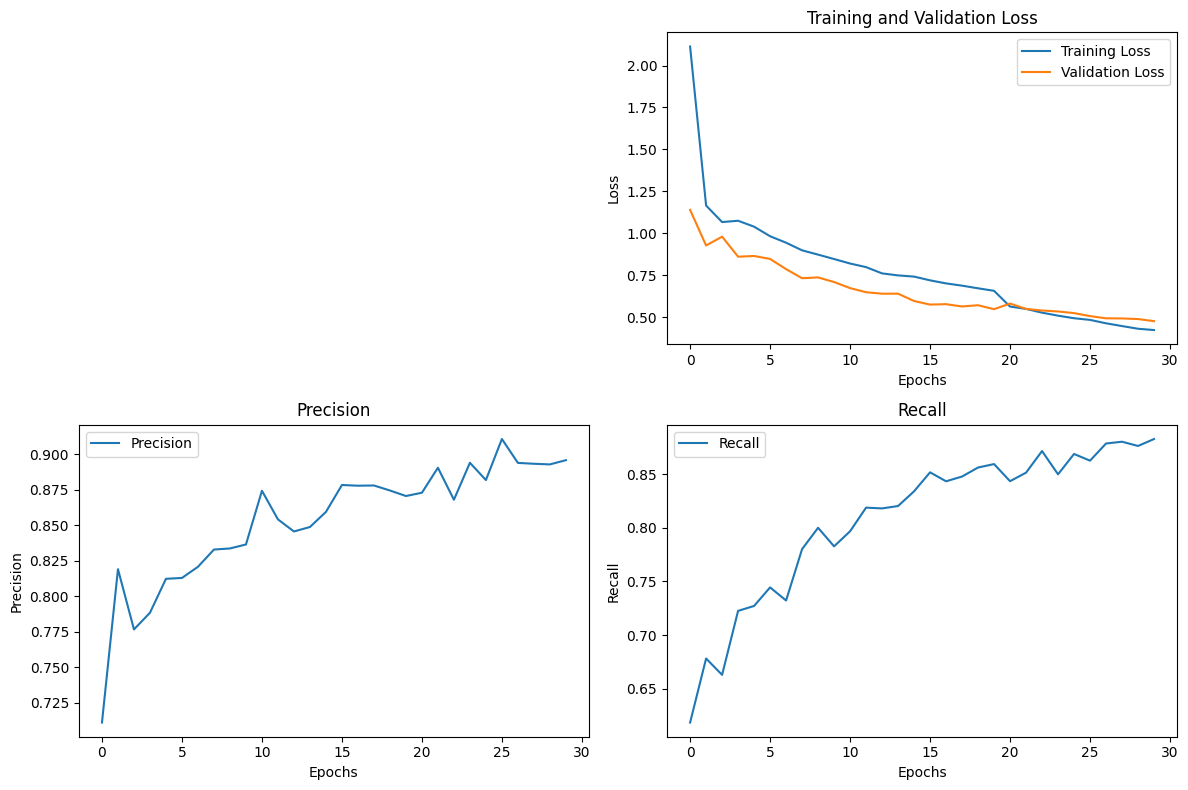

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(data[:, 0], data[:, 1], label='Train Box Loss')
plt.plot(data[:, 0], data[:, 8], label='Val Box Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Box Loss')

plt.subplot(2, 2, 2)
plt.plot(data[:, 0], data[:, 2], label='Training Loss')
plt.plot(data[:, 0], data[:, 9], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 3)
plt.plot(data[:, 0], data[:, 4], label='Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision')

plt.subplot(2, 2, 4)
plt.plot(data[:, 0], data[:, 5], label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate

results_csv_path = '/content/drive/MyDrive/Project/runs/detect/train4/results.csv'
results_df = pd.read_csv(results_csv_path)

accuracy_values = results_df['       metrics/mAP50(B)']
precision_values = results_df['   metrics/precision(B)']
recall_values = results_df['      metrics/recall(B)']


f1_scores = 2 * (precision_values * recall_values) / (precision_values + recall_values)


average_accuracy = accuracy_values.mean()
average_precision = precision_values.mean()
average_recall = recall_values.mean()
average_f1_score = f1_scores.mean()


metrics = {
    'Model': ['YOLOv8'],
    'Accuracy': [f"{average_accuracy:.2%}"],
    'Precision': [f"{average_precision:.2%}"],
    'Recall': [f"{average_recall:.2%}"],
    'F1 score': [f"{average_f1_score:.2%}"]
}


average_metrics_df = pd.DataFrame(metrics)
print(tabulate(average_metrics_df, headers='keys', tablefmt='grid'))

+----+---------+------------+-------------+----------+------------+
|    | Model   | Accuracy   | Precision   | Recall   | F1 score   |
+====+=========+============+=============+==========+============+
|  0 | YOLOv8  | 86.93%     | 85.32%      | 80.86%   | 82.99%     |
+----+---------+------------+-------------+----------+------------+
